# Notebook which allows to create 3D PDB structure to manual molecular docking procedure

In [1]:
from rdkit import Chem
from rdkit.Chem import Draw

In [2]:
smiles = 'COc1cc(C(=O)N2CCC(N3CCN(C)CC3)CC2)ccc1Nc1ncc2c(n1)N(C)c1ccccc1C(=O)N2C'

### Molecule visualization

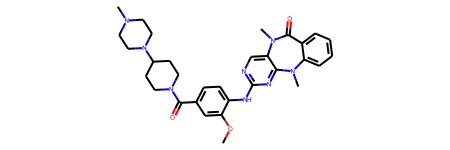

In [3]:
Chem.MolFromSmiles(smiles) #one of Kiniase Inhibitors

In [4]:
from rdkit.Chem import AllChem

### Here smiles codes can be inserted into ' ', and further code is able to convert them into 3D structure

In [5]:
smiles = ['CC(=O)NC1=CC=CC(=C1)C(=O)NCC=CC2C=CN(C)C=C(F)C=NC=C2C',
 'CC(=O)NC1=CC=CC(=C1)C(=O)N(CCC2=CC=C(F)C=C2N3C=NC=C3CC4)N[NH1]C(CC)=N4',
 'CC(=O)NC1=CC=CC(=C1)C(=O)N(C2CC3=CC=CC(CN)=C3N(C)C2C4)NC(F)=N[NH1]4']

In [6]:
mol = [Chem.MolFromSmiles(smi) for smi in smiles] 

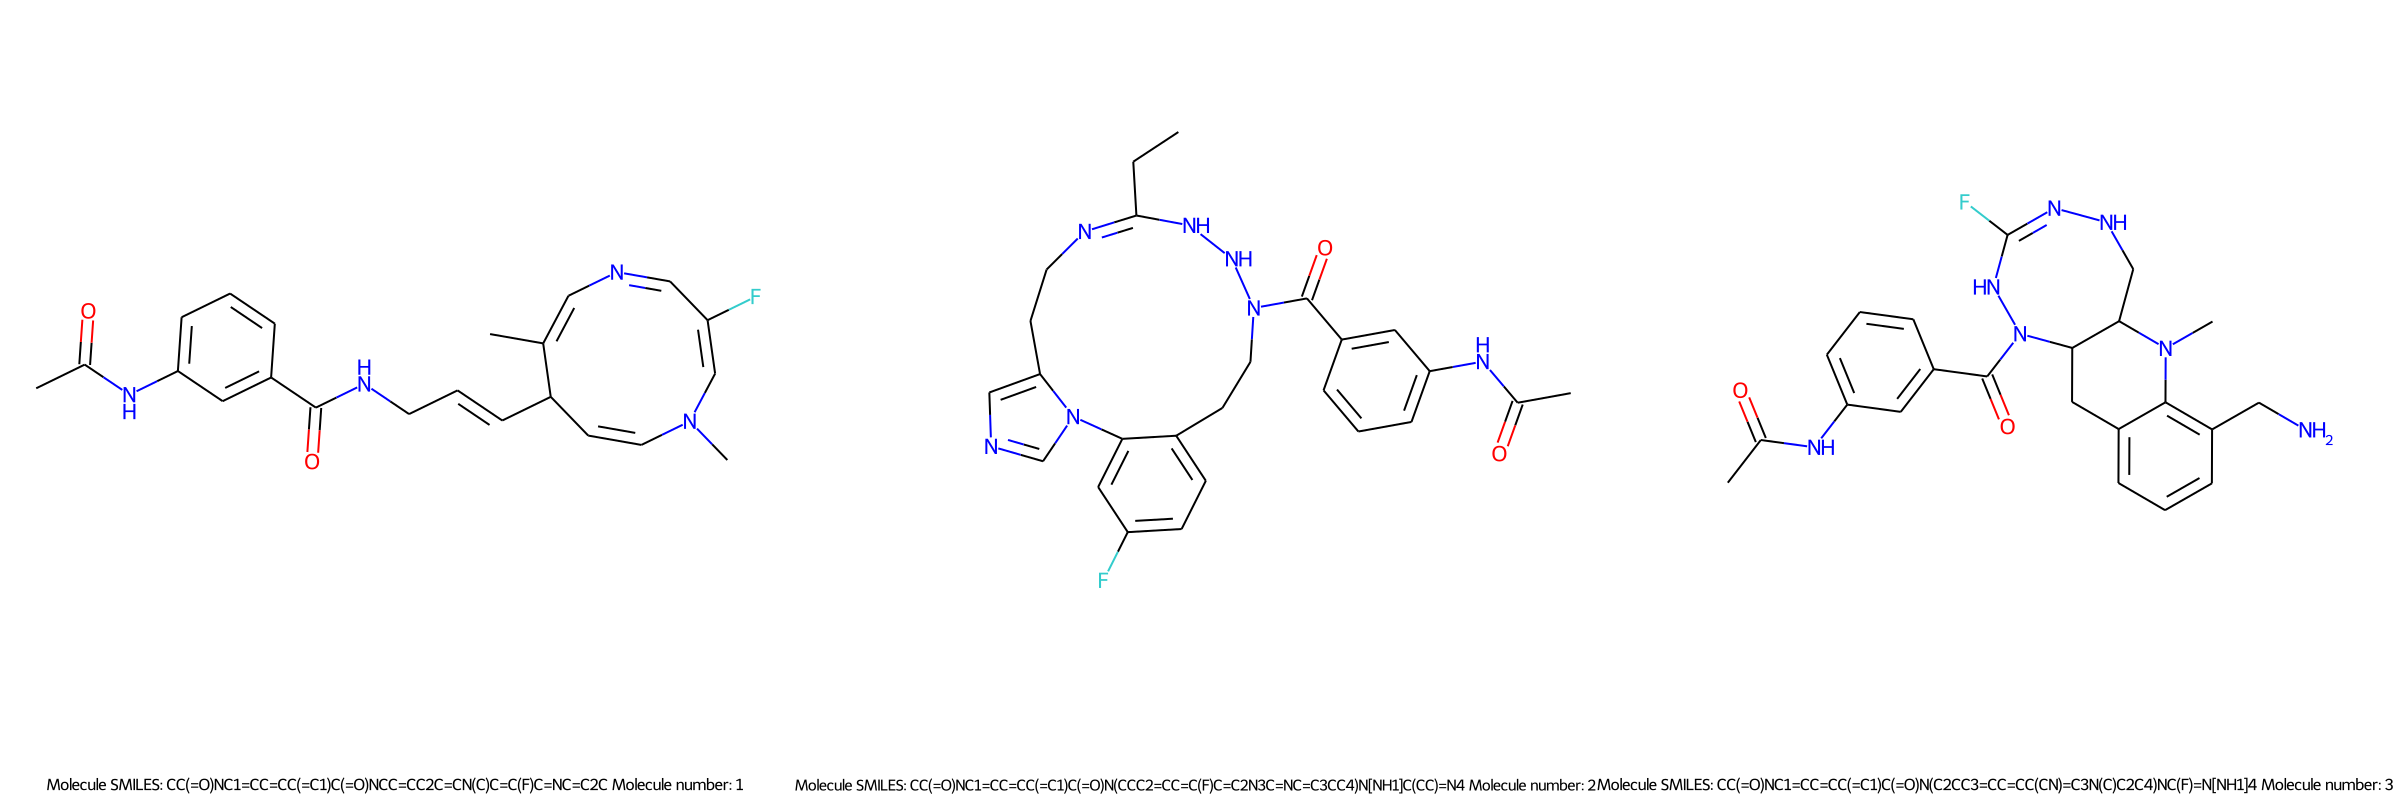

In [7]:
Draw.MolsToGridImage(mol,legends=[str("Molecule SMILES: "+str(smi)+' Molecule number: '+str(x+1)) for x, smi in enumerate(smiles)],maxMols=int(len(mol)),subImgSize=(800, 800))

In [8]:
mol_H = [Chem.AddHs(molecule) for molecule in mol]

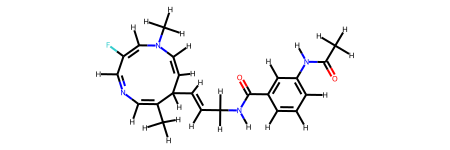

In [9]:
mol_H[0]

In [10]:
D_coord = [AllChem.EmbedMolecule(m3, randomSeed=0xf00d) for m3 in mol_H]

In [11]:
D_coord

[0, 0, 0]

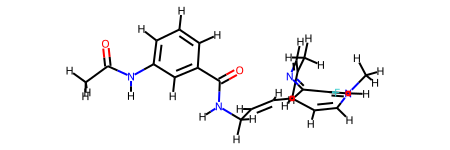

In [12]:
mol_H[0]

## Generate PDB file from SMILES

In [13]:
def create_PDB_from_SMILES(smiles_list):
    mols = []
    for smi in smiles_list:
        try:
            
            new = Chem.MolFromSmiles(smi)
            mols.append(new)
        except:
            print("Error:"+str(smi))
    mols_H = []
    for mol in mols:
        try:
            new_1 = Chem.AddHs(mol)
            new_2 = AllChem.EmbedMolecule(new_1, randomSeed=0xf00d)
            mols_H.append(new_1)
        except:
            print("Error:"+str(Chem.MolToSmiles(mol)))
    #files_creation
    for i in range(len(mols_H)):
        try:
            Chem.rdmolfiles.MolToPDBFile(mol_H[i], "3D_structure"+'_'+str(i+1)+str(smiles_list[i][0:5])+'.pdb')
        except:
            print("Something went wrong while creating PDB file...")
    return mols_H
    
    

In [14]:
vb = create_PDB_from_SMILES(smiles)

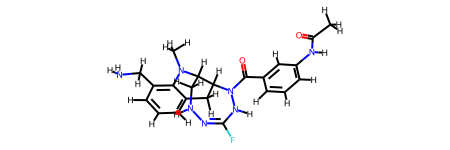

In [15]:
vb[2]